# Лабораторная работа №1
## Исследование точности различных методов численного дифференцирования
---  
### Цель: оценить точность конкретных методов численного дифференцирования на примере разных функций с вариьированием шага ошибки
---
#### Шаг: 
* $\displaystyle h = \frac{2}{2^{n}}$ with $n \in [1, 21]$ 

#### Список используемых функций:
---
##### $\displaystyle \sin(x^{2})$
##### $\displaystyle \cos(\sin(x))$
##### $\displaystyle \exp(\sin(\cos(x)))$
##### $\displaystyle \ln(x + 3)$
##### $\displaystyle \sqrt{x + 3}$
#### Список используемых методов:
---
##### $\displaystyle \frac{f(x + h) - f(x)}{h}$
##### $\displaystyle \frac{f(x) - f(x - h)}{h}$
##### $\displaystyle \frac{f(x + h) - f(x - h)}{2h}$
##### $\displaystyle \frac{4}{3} \frac{f(x + h) - f(x - h)}{2h} - \frac{1}{3} \frac{f(x + 2h) - f(x - 2h)}{4h}$
##### $\displaystyle \frac{3}{2} \frac{f(x + h) - f(x - h)}{2h} - \frac{3}{5} \frac{f(x + 2h) - f(x - 2h)}{4h} + \frac{1}{10} \frac{f(x + 3h) - f(x - 3h)}{6h}$

### Код
--- 

#### Испорт модулей:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from abc import ABC, ABCMeta, abstractmethod, abstractproperty

#### Объявление классов: 

In [ ]:
####            Abstract class 'Callable'
class ICallable (ABC):

    @abstractmethod
    def __call__(self):
        pass

####            Function is a 'callable' object
class IFunction (ICallable, ABC):
    func = 0
    name = ""
    def __init__(self, func, name = ""):
        self.func = func
        self.name = name

####            Different types of functions
class OneArgFunction(IFunction):

    def __call__(self, arg_1):
        return self.func(arg_1)

class ApproxDerCalcFunction(IFunction):
    
    def __call__(self, func, arg_1, arg_2):
        return self.func(func, arg_1, arg_2)
    
####            Graph creator
class GraphCreator(ICallable):

    graph = 0
    def __init__(self, x_size, y_size, x_scale, y_scale, name = ""):
        self.graph = plt.figure(figsize=[x_size, y_size])
        ax = self.graph.add_subplot(111)
        ax.set_xscale(x_scale)
        ax.set_yscale(y_scale)
        plt.title(name)

    def set_xyscale (self, x, y):
        ax = self.graph.add_subplot(111)
        ax.set_xscale(x)
        ax.set_yscale(y)

    def add_graph(self, x_arr, y_arr, x_name = "x", y_name = "y", color = "red", legend_name = ''):
        plt.scatter (x_arr, y_arr, c = color)
        plt.plot (x_arr, y_arr, color, label = legend_name)
        plt.legend()
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.grid()
    
    def __call__(self):
        plt.show()

```
Замечание: Автор считает предпочтительным использование объектно-ориентированного стиля программирования. В данном случае некоторая избыточность реализации необходима для настраиваемости и масштабируемости. Таким образом, в последствии части кода из этой работы могут быть использованы в других задачах
``` 

#### Инициализация объектов, используемых в исследованиии 

In [ ]:
point = 10 #Fixed point suitable to every function used by us  
h_arr = np.array([(2 / (np.left_shift(1, n))) for n in range (1, 22)]) #Filling array with values of steps 

functions = [] #Used functions
functions.append(OneArgFunction(lambda arg: np.sin(np.power(arg, 2)), "sin(x^2)"))
functions.append(OneArgFunction(lambda arg: np.cos(np.sin(arg)), "cos(sin(x))"))
functions.append(OneArgFunction(lambda arg: np.exp(np.sin(np.cos(arg))), "exp(sin(cos(x)))"))
functions.append(OneArgFunction(lambda arg: np.log(arg + 3), "ln(x + 3)"))
functions.append(OneArgFunction(lambda arg: np.sqrt(arg + 3), "sqrt(x + 3)"))

functions_ders = [] #Derivative of used functions
functions_ders.append(OneArgFunction(lambda arg: 2 * arg * np.cos(np.power(arg, 2))))
functions_ders.append(OneArgFunction(lambda arg: -(np.cos(arg) * np.sin(np.sin(arg)))))
functions_ders.append(OneArgFunction(lambda arg: -(np.exp(np.sin(np.cos(arg))) * np.cos(np.cos(arg)) * np.sin(arg))))
functions_ders.append(OneArgFunction(lambda arg: 1 / (arg + 3)))
functions_ders.append(OneArgFunction(lambda arg: 1 / (2 * np.sqrt(arg + 3))))

methods = [] #Used numerical differentiation methods
methods.append(ApproxDerCalcFunction(lambda func, arg_1, arg_2: (func(arg_1 + arg_2) - func(arg_1)) / arg_2, name = '1th'))

methods.append(ApproxDerCalcFunction(lambda func, arg_1, arg_2: (func(arg_1) - func(arg_1 - arg_2)) / arg_2, name = '2th'))

methods.append(ApproxDerCalcFunction(lambda func, arg_1, arg_2: (func(arg_1 + arg_2) - func(arg_1 - arg_2)) / (2 * arg_2), name = '3th'))

methods.append(ApproxDerCalcFunction(lambda func, arg_1, arg_2: \
                                    4 * (func(arg_1 + arg_2) - func(arg_1 - arg_2)) / (6 * arg_2) - \
                                    (func(arg_1 + 2 * arg_2) - func(arg_1 - 2 * arg_2)) / (12 * arg_2), name = '4th'))

methods.append(ApproxDerCalcFunction(lambda func, arg_1, arg_2: \
                                    3 * (func(arg_1 + arg_2) - func(arg_1 - arg_2)) / (4 * arg_2) - 
                                    3 * (func(arg_1 + 2 * arg_2) - func(arg_1 - 2 * arg_2)) / (20 * arg_2) + \
                                    (func(arg_1 + 3 * arg_2) - func(arg_1 - 3 * arg_2)) / (60 * arg_2), name = '5th'))

#### Основная часть. Подсчет и построение графиков

In [ ]:
def main ():
    for i in range (0, len(functions)):
        color = ["orange", "yellow", "blue", "green", "red"]
        Graph = GraphCreator(12, 5, 'log', 'log', functions[i].name)
        for j in range (0, len(methods)):
            err_arr = np.fabs(functions_ders[i](point) - methods[j](functions[i], point, h_arr))
            Graph.add_graph(h_arr, err_arr, "h", "err", color.pop(), methods[j].name)
        Graph()

---
### Итоговые графики:

#### $\displaystyle \sin(x^{2})$
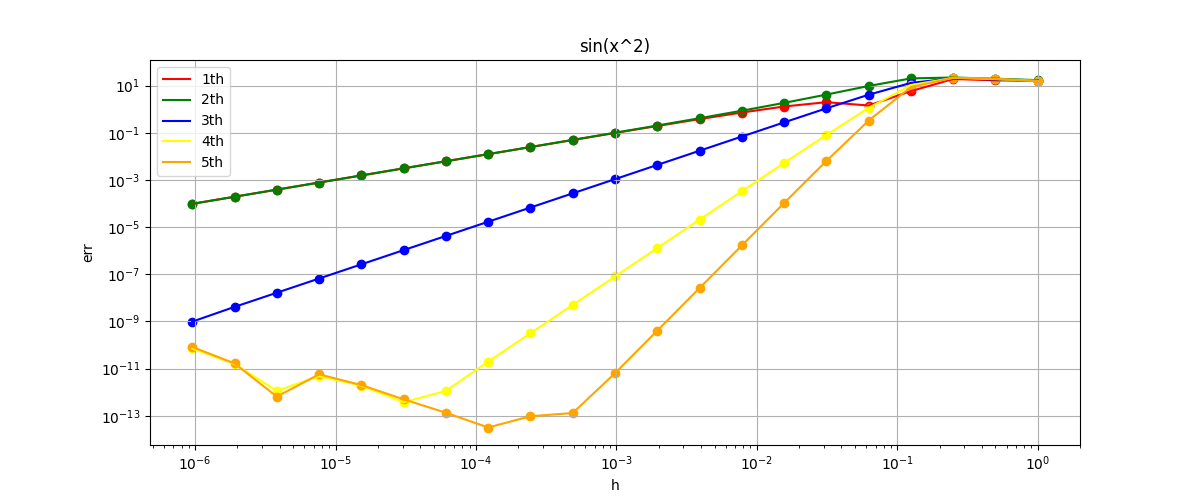

#### $\displaystyle \cos(\sin(x))$
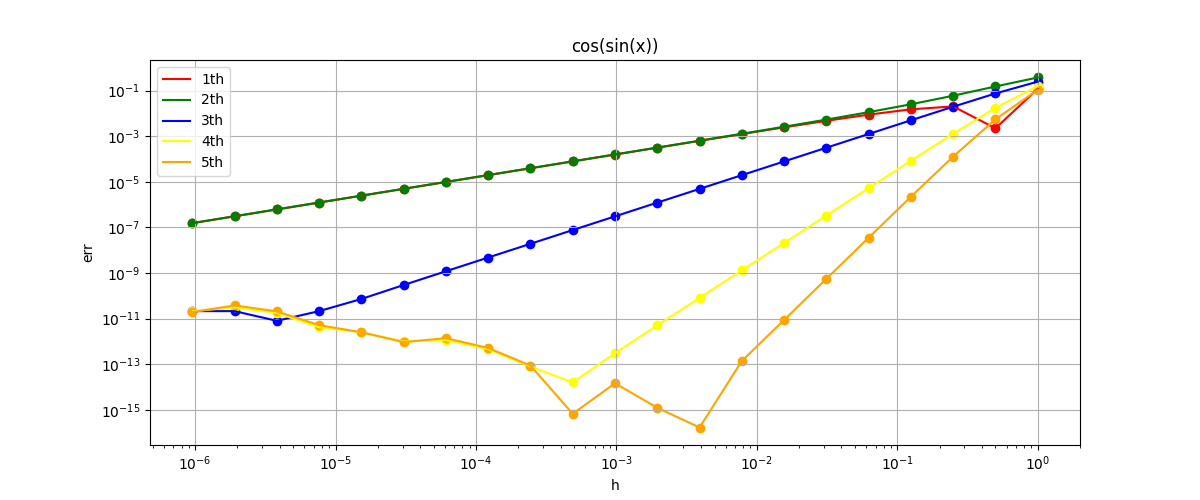

#### $\displaystyle \exp(\sin(\cos(x)))$
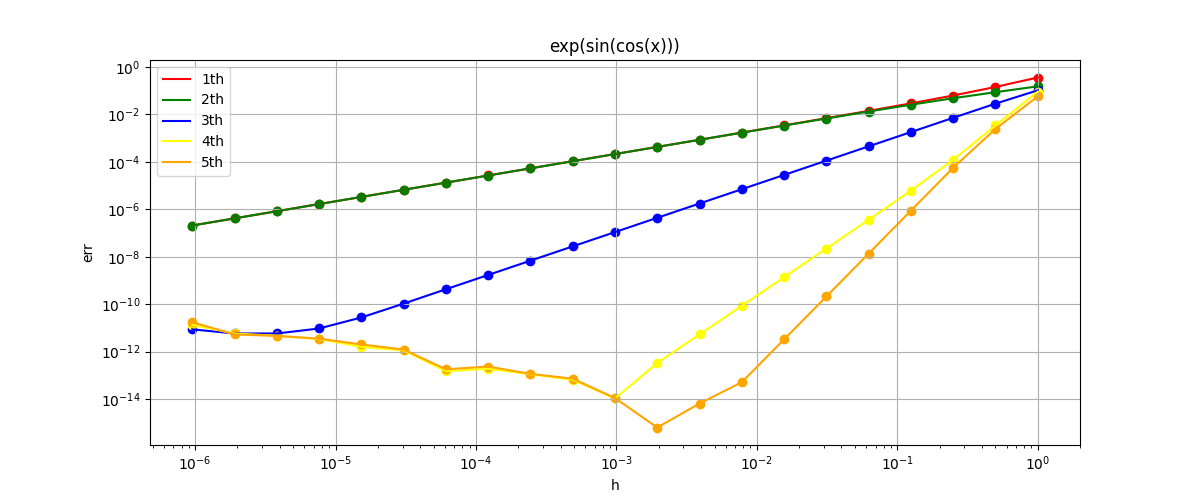

#### $\displaystyle \ln(x + 3)$
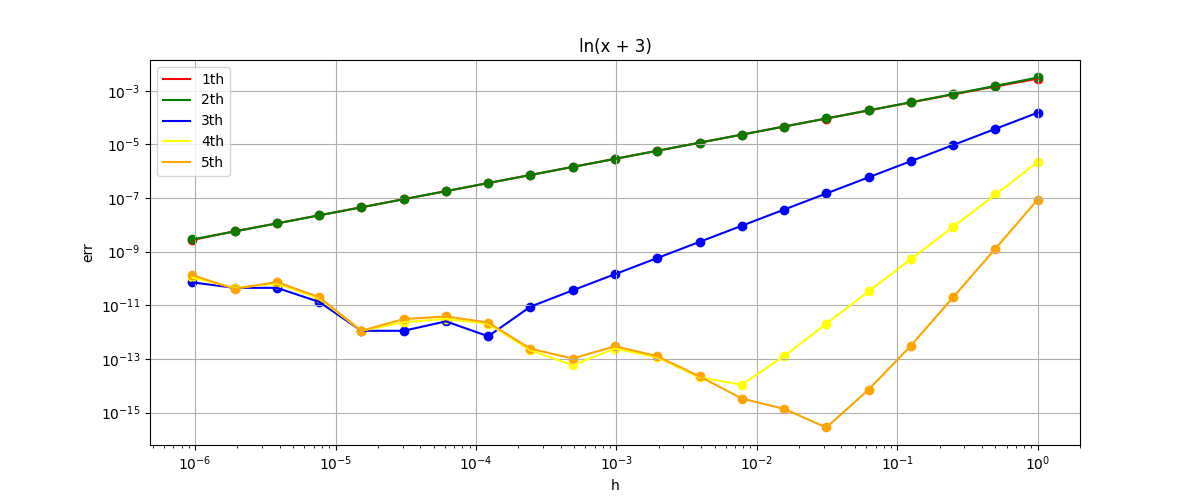

#### $\displaystyle \sqrt{x + 3}$
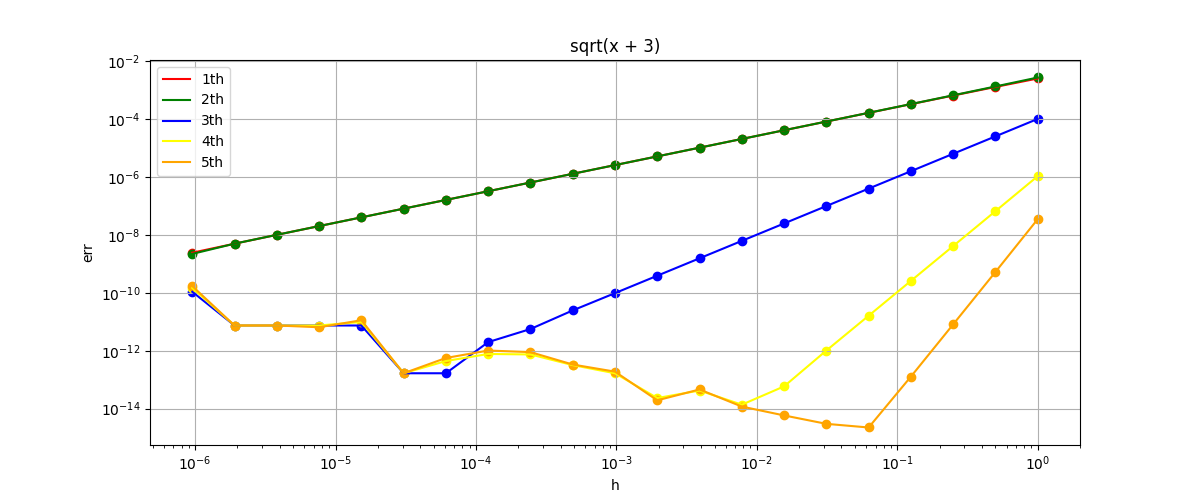

## Заключение
Точность исследумых численных методов дифференцирования отличается. Ниже приведено ранжирование в порядке убывания точности: 
```
The 5th method
The 4th method
The 3th method
The 2th method
The 1th method
```
Такие результаты объясняются разложением функций в ряд Тейлора до более высоких порядков